# Credit Card Transactional Data Analysis

Group 2:
- Alex Grimm
- Siddhant Kasture
- Chih Hao Yuan

## Introduction

Credit cards are a very big part of people's daily lives. They are used to pay for a wide range of products and services such as electricity bills and groceries. People often use credit cards to purchase larger items. For example, computers and televisions are typically more expensive items that are often purchased using a credit card. This type of payment method allows individuals to charge purchases to their card and have a structured payment plan to pay for these purchases. While this method of payment is very convenient for customrers, it is important to understand that they are regulated by financial institutions and banks. These institutuions issue, regulate, and monitor credit card purchases. Our analysis aims to explore the relationships surrounding credit cards and their purchasing history.

## Data

We have found datasets on Kaggle regarding payment information.(CaixaBank Tech & Nuwe) Our analysis aims to join three datasets detailed below:

        1. Transaction Data (CSV): Data collected on transaction history

        2. Fraud Data (JSON): Data Collected on whether or not a transaction was determined to be frauduelent

        3. Card Data (CSV): Specific card information for cards used in transactions

        4. User Data (CSV): Clients' information involved in Transaction

In order to combine our data, we will join the transaction and fraud datasets on the transaction ID column. We will then join that merged dataset with the card dataset on the card ID column.

## Research Questions

In our analysis, we aim to explore three research questions surrounding this topic and data. Our defined research questions are as follows:

        1. Which card brands are used the most? Can we determine which card brands spend the most per purchase?
        Do these values change depending on the month of year?

        2. Do the clients who have higher credit_limit tend to spend more?

        3. Fraudulent transaction analysis using distributions, card-types & time-series data

## Python Packages Used in Our Analysis

Throughout our analysis, we utilized a few different python packages to help explore our data and anaylyze our three research questions. There are many different uses for the packages that were implemented in our analysis, but we will discuss our main uses of these packages. The packages and their general uses can be seen below:
            
        1. Pandas: Used to load in dataframe, manipulate and clean data, group data, make calculations (minimum, median, mean, etc.), generate and annotate simple visualizations.

        2. Holoviews: Create simple, easy visualizations to help support our analysis

        3. Bokeh: Add interactive features that help provide more insight to the visualizations that have been created.

        4. Matplotlib: Create and annotate certain types of graphs

## Loading Data

### Load Transaction Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

transactionData = pd.read_csv(r"/content/drive/MyDrive/Final_project_data/transactions_data.csv") #Load the transactions df in
transactionData.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [ ]:
transactionData.info() #Check the data types and null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


Load in transaction data and check to make sure variables are in the right format.

### Load Fraud Data

In [ ]:
import json

fraud_path_json = r"/content/drive/MyDrive/Final_project_data/train_fraud_labels.json" #json path

with open(fraud_path_json, 'r') as file:   #open the json file
  fraudData_json = json.load(file)  #load the file

fraud_df = pd.DataFrame(fraudData_json) #convert to a pandas df
fraud_df = fraud_df.reset_index()  #reset index
fraud_df=fraud_df.rename(columns={'index':'transaction_id'}) #rename index

fraud_df.head()

,transaction_id,target
0,10649266,No
1,23410063,No
2,9316588,No
3,12478022,No
4,9558530,No


In [ ]:
fraud_df.info() #Check the data types and null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   transaction_id  object
 1   target          object
dtypes: object(2)
memory usage: 136.0+ MB


In [ ]:
fraud_df['transaction_id'] = fraud_df['transaction_id'].astype(int) #Convert the transaction_id to int

Load in Fraud data in JSON form. Convert the Json data to a pandas dataframe. Finally, convert transaction ID to an integer.

### Load Card Data

In [ ]:
card_df=pd.read_csv(r"/content/drive/MyDrive/Final_project_data/cards_data.csv") #Load the cards df in
card_df=card_df.rename(columns={'id':'card_id'}) #rename the id column to card_id
card_df.head()

,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [ ]:
card_df.info() #Check the data types and null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   card_id                6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


Load in the card dataframe and check to make sure the data types are correct.

## Merge Datasets

In [ ]:
merged_df = pd.merge(transactionData, fraud_df, left_on='id', right_on='transaction_id', how='inner') #Merge the transactions and fraud df on transaction_id
merged_df = merged_df.drop(columns=['transaction_id']) #drop the transaction_id column since there are 2
merged_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,No
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,No
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,No
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,No
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN,No


Merge the transaction and fraud dataframes together using an inner join. Merge using the transaction ID variable.

In [ ]:
merged_df = pd.merge(merged_df, card_df, left_on='card_id', right_on='card_id', how='inner') #Merge the merged df with the cards df on card_id
merged_df.head()

,id,date,client_id_x,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,Debit (Prepaid),5497590243197280,07/2022,306,YES,2,$55,05/2008,2008,No
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,Credit,5175842699412235,12/2024,438,YES,1,$9100,09/2005,2015,No
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,Debit,5874992802287595,05/2020,256,YES,1,$14802,01/2006,2008,No
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,Debit,4354185735186651,01/2020,120,YES,1,$19113,07/2009,2014,No
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,...,Debit (Prepaid),5207231566469664,03/2014,198,YES,1,$89,01/2008,2015,No


Merge the joined dataframe with the card dataframe on the card ID. In total the full dataframe has about 9 million rows and 25 columns

In [ ]:
merged_df.shape

(8914963, 25)

## Research Question 1: Which card brands are used the most? Can we determine which card brands spend the most? Do these values change depending on the month of year?

First, we take a subset of the variables including the card type, card brand, date, and amount. We then need to remove the dollar sign from the amount column and convert it to a float. We then convert the date column to a datetime object and create a new column in the data with month extracted.

In [ ]:
card_expense_df = merged_df[['card_type', 'card_brand', 'date', 'amount']] #Select the columns we need
card_expense_df['amount']= card_expense_df['amount'].replace({'\$':''}, regex=True) #Remove the $ sign from the amount column
card_expense_df['amount']= card_expense_df['amount'].astype(float) #Convert the amount column to float
card_expense_df['date'] = pd.to_datetime(card_expense_df['date']) #Convert the date column to datetime
card_expense_df['month'] = card_expense_df['date'].dt.month #Extract the month from the date column
card_expense_df.info() #Check the data types in the df

<ipython-input-12-cc76c89fe86f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_expense_df['amount']= card_expense_df['amount'].replace({'\$':''}, regex=True) #Remove the $ sign from the amount column
<ipython-input-12-cc76c89fe86f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_expense_df['amount']= card_expense_df['amount'].astype(float) #Convert the amount column to float
<ipython-input-12-cc76c89fe86f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   card_type   object        
 1   card_brand  object        
 2   date        datetime64[ns]
 3   amount      float64       
 4   month       int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 306.1+ MB


<ipython-input-12-cc76c89fe86f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_expense_df['month'] = card_expense_df['date'].dt.month #Extract the month from the date column


In [ ]:
#group the data by brand and calculate summary statistics

purchase_by_brand_df=pd.DataFrame()

purchase_by_brand_df['total_purchases'] = card_expense_df.groupby(['card_brand'])['amount'].count()
purchase_by_brand_df['total_amount_spent'] = card_expense_df.groupby(['card_brand'])['amount'].sum()
purchase_by_brand_df['minimum_purchase'] = card_expense_df.groupby(['card_brand'])['amount'].min()
purchase_by_brand_df['median_purchase'] = card_expense_df.groupby(['card_brand'])['amount'].median()
purchase_by_brand_df['average_purchase'] = card_expense_df.groupby(['card_brand'])['amount'].mean()
purchase_by_brand_df['maximum_purchase'] = card_expense_df.groupby(['card_brand'])['amount'].max()

purchase_by_brand_df=purchase_by_brand_df.reset_index()

purchase_by_brand_df=purchase_by_brand_df.sort_values(by=['average_purchase'], ascending=False)

purchase_by_brand_df.sort_values(by='average_purchase', ascending=False).head()

,card_brand,total_purchases,total_amount_spent,minimum_purchase,median_purchase,average_purchase,maximum_purchase
0,Amex,572424,3.140530e+07,-500.0,39.31,54.863710,4077.18
1,Discover,225242,1.233148e+07,-500.0,37.49,54.747703,3599.30
3,Visa,3321615,1.462436e+08,-500.0,30.04,44.027867,5591.73
2,Mastercard,4795682,1.929118e+08,-500.0,26.86,40.226143,6613.44


In this table, we calculate summary statistics for transactions and different card brands. Notice that American Express cards seem have the highest average transaction amount, while Mastercards are used the most.

In [ ]:
# Group the data by month and calculate summary statistics

purchase_by_month_df=pd.DataFrame()

purchase_by_month_df['total_purchases'] = card_expense_df.groupby(['month'])['amount'].count()
purchase_by_month_df['total_amount_spent'] = card_expense_df.groupby(['month'])['amount'].sum()
purchase_by_month_df['minimum_purchase'] = card_expense_df.groupby(['month'])['amount'].min()
purchase_by_month_df['median_purchase'] = card_expense_df.groupby(['month'])['amount'].median()
purchase_by_month_df['average_purchase'] = card_expense_df.groupby(['month'])['amount'].mean()
purchase_by_month_df['maximum_purchase'] = card_expense_df.groupby(['month'])['amount'].max()

purchase_by_month_df=purchase_by_month_df.reset_index()

purchase_by_month_df=purchase_by_month_df.sort_values(by=['average_purchase'], ascending=False)

purchase_by_month_df.head(12)

,month,total_purchases,total_amount_spent,minimum_purchase,median_purchase,average_purchase,maximum_purchase
5,6,748846,32346129.46,-500.0,28.94,43.194635,4685.23
9,10,769825,33223572.60,-500.0,29.31,43.157305,5696.78
3,4,740774,31962257.67,-500.0,29.29,43.147111,4077.18
6,7,772952,33337706.12,-500.0,29.03,43.130370,4633.43
1,2,690955,29784168.34,-500.0,29.07,43.105800,4004.73
2,3,767659,33035846.87,-500.0,29.01,43.034533,4978.45
8,9,748698,32067248.94,-500.0,28.92,42.830686,4729.38
4,5,768023,32889542.59,-500.0,28.90,42.823643,3677.13
11,12,696411,29778560.83,-500.0,28.88,42.760038,4266.21
10,11,672536,28748345.38,-500.0,28.81,42.746181,5155.36


In this table, we calculate summary statistics for transactions grouped by month of the year. Notice that the average transaction amount is the most in June, followed by October. It is worth noting that the spread in the average amount does not vary too much.

In [ ]:
#Create a new dataframe to show the purchases by month and brand

purchase_by_month_brand_df=pd.DataFrame()

purchase_by_month_brand_df['total_purchases'] = card_expense_df.groupby(['month', 'card_brand'])['amount'].count()
purchase_by_month_brand_df['total_amount_spent'] = card_expense_df.groupby(['month', 'card_brand'])['amount'].sum()
purchase_by_month_brand_df['minimum_purchase'] = card_expense_df.groupby(['month', 'card_brand'])['amount'].min()
purchase_by_month_brand_df['median_purchase'] = card_expense_df.groupby(['month', 'card_brand'])['amount'].median()
purchase_by_month_brand_df['average_purchase'] = card_expense_df.groupby(['month', 'card_brand'])['amount'].mean()
purchase_by_month_brand_df['maximum_purchase'] = card_expense_df.groupby(['month', 'card_brand'])['amount'].max()
purchase_by_month_brand_df['stdDev_purchase'] = card_expense_df.groupby(['month', 'card_brand'])['amount'].std()

purchase_by_month_brand_df=purchase_by_month_brand_df.reset_index()

purchase_by_month_brand_df.head(15)

,month,card_brand,total_purchases,total_amount_spent,minimum_purchase,median_purchase,average_purchase,maximum_purchase,stdDev_purchase
0,1,Amex,49163,2660254.77,-500.0,39.420,54.110912,1762.30,96.624929
1,1,Discover,19425,1045301.98,-500.0,37.620,53.812200,2143.95,96.238803
2,1,Mastercard,410849,16538396.56,-500.0,26.820,40.254197,6613.44,77.018320
3,1,Visa,283911,12350838.37,-500.0,29.850,43.502500,5591.73,82.478756
4,2,Amex,44633,2462646.83,-497.0,39.260,55.175472,1760.94,99.264741
5,2,Discover,17400,959374.38,-500.0,37.785,55.136459,3599.30,105.316449
6,2,Mastercard,372307,14966962.77,-500.0,26.930,40.200595,4004.73,76.840304
7,2,Visa,256615,11395184.36,-500.0,30.130,44.405761,3523.13,84.143706
8,3,Amex,49203,2708582.78,-500.0,39.050,55.049139,2808.44,100.771887
9,3,Discover,19006,1044103.06,-500.0,37.420,54.935445,1541.82,100.228519


We then follow the same structure as in the table above and group by month and brand and calculate summary statistics for the the transactions. This table is hard to interpret by looking at it, but it was created to help create visualizations in the next part.

In [ ]:
amex_data = purchase_by_month_brand_df[purchase_by_month_brand_df['card_brand'] == 'Amex']
discover_data = purchase_by_month_brand_df[purchase_by_month_brand_df['card_brand'] == 'Discover']
visa_data = purchase_by_month_brand_df[purchase_by_month_brand_df['card_brand'] == 'Visa']
mastercard_data = purchase_by_month_brand_df[purchase_by_month_brand_df['card_brand'] == 'Mastercard']

In this code we filter the table grouped by month and card brand by each card brand. This allows us to have seperate data for each card brand over the year.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
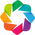

:Overlay
   .Curve.Amex       :Curve   [month]   (total_purchases)
   .Curve.Discover   :Curve   [month]   (total_purchases)
   .Curve.Visa       :Curve   [month]   (total_purchases)
   .Curve.Mastercard :Curve   [month]   (total_purchases)

In [ ]:
import holoviews as hv

hv.extension('bokeh')

# Plot with HoloViews
amex_curve = hv.Curve(amex_data, 'month', 'total_purchases', label='Amex')
discover_curve = hv.Curve(discover_data, 'month', 'total_purchases', label='Discover')
visa_curve = hv.Curve(visa_data, 'month', 'total_purchases', label='Visa')
mastercard_curve = hv.Curve(mastercard_data, 'month', 'total_purchases', label='Mastercard')

plot = amex_curve * discover_curve * visa_curve * mastercard_curve  # Overlay the two curves
plot.opts(width=1600, height=800)

Based on this graph, we can see that Mastercards had the most purchases per month, while Discover had the least amount of purchases. Based on the graph, the purchasing totals for American Express and Discover are fairly constant throughout the year. When we look at Master card and visa, we see an increase around October and then a sudden dip, which is unexpected. Purchases then increase around November, which makes sense due to the Holidays that occur during that time of year.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
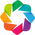

:Overlay
   .Curve.Amex       :Curve   [month]   (average_purchase)
   .Curve.Discover   :Curve   [month]   (average_purchase)
   .Curve.Visa       :Curve   [month]   (average_purchase)
   .Curve.Mastercard :Curve   [month]   (average_purchase)

In [ ]:
hv.extension('bokeh')

# Plot with HoloViews
amex_curve = hv.Curve(amex_data, 'month', 'average_purchase', label='Amex')
discover_curve = hv.Curve(discover_data, 'month', 'average_purchase', label='Discover')
visa_curve = hv.Curve(visa_data, 'month', 'average_purchase', label='Visa')
mastercard_curve = hv.Curve(mastercard_data, 'month', 'average_purchase', label='Mastercard')

plot = amex_curve * discover_curve * visa_curve * mastercard_curve  # Overlay the two curves
plot.opts(width=1600, height=800)

Based on this graph, we can see that the average purchase amount is nearly the same for American Express and Discover cards. Their average spending is nearly $10 more on average than Visas and 15 dollars more than Mastercards.  We see more peaks and dips in this data, but it seems to follow the same pattern that we mentioned before. Could this be due to the type of cards that each company provides?

In [ ]:
card_brand_type_df=pd.DataFrame()

card_brand_type_df['total_purchases'] = card_expense_df.groupby(['card_brand', 'card_type'])['amount'].count()

card_brand_type_df=card_brand_type_df.reset_index()

card_brand_type_df


,card_brand,card_type,total_purchases
0,Amex,Credit,572424
1,Discover,Credit,225242
2,Mastercard,Credit,842266
3,Mastercard,Debit,3529861
4,Mastercard,Debit (Prepaid),423555
5,Visa,Credit,1113535
6,Visa,Debit,2018335
7,Visa,Debit (Prepaid),189745


We see that Mastercard and Visa provide Credit Cards, Debit Cards, and Prepaid Debit Cards. Since prepaid cards and Debit Cards can only be spent when there is money left on the card or in the account, I believe that people are less inclined to make more expensive purchases with these payment methods. However, it is worth noting that there are significantly more purchases made with these cards. This leads us to believe that people use them for more frequent, less expensive purchases. American Express and Discover cards only purchasing restrictions are the credit limit associated with the account. We believe that this causes individuals to be more comfortable with spending larger amounts on purchases.

## Research Question 2: Do the clients who have higher credit_limit tend to spend more?



We need to clean the dataset first.

In [ ]:
# remove the "$" sign
merged_df["amount_clean"] = merged_df["amount"].str.replace("$","")
merged_df["credit_limit_clean"] = merged_df["credit_limit"].str.replace("$","")

# convert the datatype to float
merged_df["amount_clean"] = merged_df["amount_clean"].astype(float)
merged_df["credit_limit_clean"] = merged_df["credit_limit_clean"].astype(float)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   date                   object 
 2   client_id_x            int64  
 3   card_id                int64  
 4   amount                 object 
 5   use_chip               object 
 6   merchant_id            int64  
 7   merchant_city          object 
 8   merchant_state         object 
 9   zip                    float64
 10  mcc                    int64  
 11  errors                 object 
 12  target                 object 
 13  client_id_y            int64  
 14  card_brand             object 
 15  card_type              object 
 16  card_number            int64  
 17  expires                object 
 18  cvv                    int64  
 19  has_chip               object 
 20  num_cards_issued       int64  
 21  credit_limit           object 
 22  acct_open_date    

In [ ]:
# convet "date" datatype from object to datetime
merged_df["date"] = pd.to_datetime(merged_df["date"])

In [ ]:
# extract "month" and "year" from "date" column to new columns for further analysis
merged_df["date_month"] = merged_df["date"].dt.month
merged_df["date_year"] = merged_df["date"].dt.year

In [ ]:
merged_df

,id,date,client_id_x,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,amount_clean,credit_limit_clean,date_month,date_year
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,YES,2,$55,05/2008,2008,No,-77.00,55.0,1,2010
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,YES,1,$9100,09/2005,2015,No,14.57,9100.0,1,2010
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,YES,1,$14802,01/2006,2008,No,80.00,14802.0,1,2010
3,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,YES,1,$19113,07/2009,2014,No,46.41,19113.0,1,2010
4,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,...,YES,1,$89,01/2008,2015,No,4.81,89.0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,$12.93,Chip Transaction,47508,Cosby,TN,37722.0,...,YES,1,$8333,10/2003,2007,No,12.93,8333.0,10,2019
8914959,23761863,2019-10-31 23:54:00,1384,3723,$67.01,Chip Transaction,58136,Williamson,GA,30292.0,...,YES,2,$24617,07/2004,2006,No,67.01,24617.0,10,2019
8914960,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,YES,1,$26743,03/2019,2019,No,1.11,26743.0,10,2019
8914961,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,...,YES,1,$5141,03/2004,2012,No,12.80,5141.0,10,2019


In [ ]:
# Group the data by client_id, sum the spending amount, and save the result as a new dataset.

client_spend = merged_df.groupby("client_id_x")["amount_clean"].sum().reset_index()
client_spend.columns = ["client_id", "total_amount"]
client_spend

,client_id,total_amount
0,0,426104.13
1,1,225056.29
2,2,193234.94
3,3,188339.97
4,4,398703.73
...,...,...
1214,1994,294425.94
1215,1995,286000.03
1216,1996,229605.35
1217,1997,394657.47


In [ ]:
# Group the data by client_id and calculate the average credit_limit, since most people have more than one credit card; and save the result as a new dataset

client_credit_limit = merged_df.groupby("client_id_x")["credit_limit_clean"].mean().round(2).reset_index()
client_credit_limit.columns = ["client_id", "avg_credit_limit"]
client_credit_limit

,client_id,avg_credit_limit
0,0,25026.96
1,1,14113.58
2,2,10155.75
3,3,2273.14
4,4,24156.17
...,...,...
1214,1994,14918.53
1215,1995,7991.20
1216,1996,12577.43
1217,1997,22825.56


In [ ]:
# Merge two dataset together

cor_spend_credit_limit = pd.merge(client_spend,
                  client_credit_limit,
                  left_on='client_id',
                  right_on='client_id',
                  how='inner')
cor_spend_credit_limit

,client_id,total_amount,avg_credit_limit
0,0,426104.13,25026.96
1,1,225056.29,14113.58
2,2,193234.94,10155.75
3,3,188339.97,2273.14
4,4,398703.73,24156.17
...,...,...,...
1214,1994,294425.94,14918.53
1215,1995,286000.03,7991.20
1216,1996,229605.35,12577.43
1217,1997,394657.47,22825.56


In [ ]:
# Assign client to different credit_limit groups based on avg_credit_limit using number itself rather than quartile.
cor_spend_credit_limit['limit_group'] = pd.cut(cor_spend_credit_limit['avg_credit_limit'],
                         bins=3,
                         labels=['Low', 'Medium', 'High'])
cor_spend_credit_limit

,client_id,total_amount,avg_credit_limit,limit_group
0,0,426104.13,25026.96,Low
1,1,225056.29,14113.58,Low
2,2,193234.94,10155.75,Low
3,3,188339.97,2273.14,Low
4,4,398703.73,24156.17,Low
...,...,...,...,...
1214,1994,294425.94,14918.53,Low
1215,1995,286000.03,7991.20,Low
1216,1996,229605.35,12577.43,Low
1217,1997,394657.47,22825.56,Low


In [ ]:
# To see the correlation between "total_amount" and "avg_credit_limit"
round(cor_spend_credit_limit["total_amount"].corr(cor_spend_credit_limit["avg_credit_limit"]),4)

np.float64(0.4077)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
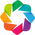

In [ ]:
import holoviews as hv
hv.extension('bokeh')

In [ ]:
hv.help(hv.Scatter)

Scatter

Online example: https://holoviews.org/reference/elements/bokeh/Scatter.html

-------------
Style Options
-------------

	alpha, angle, cmap, color, fill_alpha, fill_color, hit_dilation, hover_alpha, hover_color, hover_fill_alpha, hover_fill_color, hover_line_alpha, hover_line_cap, hover_line_color, hover_line_dash, hover_line_dash_offset, hover_line_join, hover_line_width, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, marker, muted, muted_alpha, muted_color, muted_fill_alpha, muted_fill_color, muted_line_alpha, muted_line_cap, muted_line_color, muted_line_dash, muted_line_dash_offset, muted_line_join, muted_line_width, nonselection_alpha, nonselection_color, nonselection_fill_alpha, nonselection_fill_color, nonselection_line_alpha, nonselection_line_cap, nonselection_line_color, nonselection_line_dash, nonselection_line_dash_offset, nonselection_line_join, nonselection_line_width, palette, selection_alpha, selection_color, selection_fill

In [ ]:
# Use a scatter plot to visualize the relationship (median positive correlation = 0.4077)
from holoviews import dim

scatters = hv.Scatter(cor_spend_credit_limit, kdims="avg_credit_limit", vdims = ["total_amount", "limit_group",'client_id'])
scatters.opts(
    title = 'Scatter Plot of Credit_Limit and Total Spending Amount',
    xlabel = 'Credit Limit',
    ylabel = 'Spending Amount',
    tools = ['hover'],
    width = 800,
    height = 600,
    size = 5,
    alpha = 0.8,
    color=dim("limit_group").categorize({
        "Low": "#1f77b4",     #blue = low credit limit group
        "Medium": "#2ca02c",  #green = medium
        "High": "#d62728",    #red = high credit limit group
    })
)

:Scatter   [avg_credit_limit]   (total_amount,limit_group,client_id)

We observe that user 96 has the highest total spending over the 10 years, even though not having a particularly high credit limit.  
We can do further investigation into their payment behavior to determine if they are consistently making payments.  
And also we can see his/her purchasing behavior because he/she is the top used client.  

In [ ]:
usersData = pd.read_csv("/content/drive/MyDrive/Final_project_data/users_data.csv")
usersData.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [ ]:
usersData[usersData["id"] == 96]

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1150,96,69,66,1950,12,Female,20 Oak Street,33.89,-117.78,$38948,$99825,$4344,685,4


She has a good yearly income (99,825), and a relatively low total debt (4,344), indicating that she is likely making her payments. Her credit score of 685 is good. Therefore, we consider her a good client and would like to take a closer look at her spending behavior.

In [ ]:
merged_df[merged_df["client_id_x"] == 96]

,id,date,client_id_x,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,amount_clean,credit_limit_clean,date_month,date_year
834,7476816,2010-01-01 10:59:00,96,5175,$171.17,Swipe Transaction,81591,Yorba Linda,CA,92886.0,...,NO,2,$18900,10/2009,2013,No,171.17,18900.0,1,2010
1620,7478225,2010-01-01 16:13:00,96,3773,$102.17,Swipe Transaction,61195,Yorba Linda,CA,92886.0,...,YES,1,$18300,07/2006,2008,No,102.17,18300.0,1,2010
1630,7478245,2010-01-01 16:19:00,96,3773,$86.00,Swipe Transaction,61195,Yorba Linda,CA,92886.0,...,YES,1,$18300,07/2006,2008,No,86.00,18300.0,1,2010
1675,7478319,2010-01-01 16:35:00,96,5175,$109.43,Swipe Transaction,61195,Yorba Linda,CA,92886.0,...,NO,2,$18900,10/2009,2013,No,109.43,18900.0,1,2010
1784,7478521,2010-01-01 17:37:00,96,3695,$-98.00,Swipe Transaction,43293,Yorba Linda,CA,92887.0,...,YES,2,$19959,07/2003,2013,No,-98.00,19959.0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914441,23760827,2019-10-31 16:50:00,96,3695,$-73.00,Chip Transaction,43293,Yorba Linda,CA,92887.0,...,YES,2,$19959,07/2003,2013,No,-73.00,19959.0,10,2019
8914447,23760838,2019-10-31 16:52:00,96,3695,$73.00,Chip Transaction,43293,Yorba Linda,CA,92887.0,...,YES,2,$19959,07/2003,2013,No,73.00,19959.0,10,2019
8914543,23761011,2019-10-31 17:48:00,96,5175,$83.85,Swipe Transaction,43293,Yorba Linda,CA,92887.0,...,NO,2,$18900,10/2009,2013,No,83.85,18900.0,10,2019
8914590,23761095,2019-10-31 18:16:00,96,3695,$2.52,Chip Transaction,14528,Yorba Linda,CA,92887.0,...,YES,2,$19959,07/2003,2013,No,2.52,19959.0,10,2019


In [ ]:
merged_df[merged_df["client_id_x"] == 96].groupby("date_month")["amount_clean"].sum()

,amount_clean
date_month,
1,131576.69
2,118620.68
3,138865.20
4,131035.48
5,140468.83
6,137151.37
7,148314.60
8,145209.97
9,145956.45


In [ ]:
# Extract user96 information to a new dataset and group by "date_year" and sum the "amount_clean".
# To see her yearly spending habits
user96_yearly_spending = merged_df[merged_df["client_id_x"] == 96].groupby("date_year")["amount_clean"].sum().reset_index()
user96_yearly_spending

,date_year,amount_clean
0,2010,167591.28
1,2011,175453.56
2,2012,159256.33
3,2013,173026.89
4,2014,159056.05
5,2015,174672.36
6,2016,155828.64
7,2017,169115.40
8,2018,166566.73
9,2019,130385.92


In [ ]:
hv.help(hv.Curve)

Curve

Online example: https://holoviews.org/reference/elements/bokeh/Curve.html

-------------
Style Options
-------------

	alpha, color, hover_alpha, hover_color, hover_line_alpha, hover_line_cap, hover_line_color, hover_line_dash, hover_line_dash_offset, hover_line_join, hover_line_width, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, muted, muted_alpha, muted_color, muted_line_alpha, muted_line_cap, muted_line_color, muted_line_dash, muted_line_dash_offset, muted_line_join, muted_line_width, nonselection_alpha, nonselection_color, nonselection_line_alpha, nonselection_line_cap, nonselection_line_color, nonselection_line_dash, nonselection_line_dash_offset, nonselection_line_join, nonselection_line_width, selection_alpha, selection_color, selection_line_alpha, selection_line_cap, selection_line_color, selection_line_dash, selection_line_dash_offset, selection_line_join, selection_line_width, visible

(Consult bokeh's documentation for more inf

In [ ]:
# Use a line chart for clear and straightforward insights
curve = hv.Curve(user96_yearly_spending,
                 kdims =  "date_year",
                 vdims = "amount_clean").opts(
                    title = "Line chart of Yearly Total Spending of #User 96",
                    xlabel = 'Year',
                    ylabel = 'Total Spending Amount',
                    xticks=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
                    yformatter="%.0f",
                    width = 800,
                    height = 600,
                    color = "#1f77b4",
                    line_width = 4
                 )

points = hv.Scatter(user96_yearly_spending,
                    kdims="date_year",
                    vdims="amount_clean").opts(
                        size=8,
                        color='darkorange',
                        marker='circle',
                        alpha=0.8,
                        tools = ['hover']
                )
curve * points

:Overlay
   .Curve.I   :Curve   [date_year]   (amount_clean)
   .Scatter.I :Scatter   [date_year]   (amount_clean)

We found an interesting pattern: she tends to spend less in even-numbered years and more in odd-numbered years. There was also a steep drop in 2019, which we believe was due to the pandemic.

In [ ]:
# To see what kind of card she spent the most
user96_cardtype = merged_df[merged_df["client_id_x"] == 96].groupby("card_type")["amount_clean"].sum().reset_index()
user96_cardtype

,card_type,amount_clean
0,Credit,1088661.51
1,Debit,542291.65


In [ ]:
hv.help(hv.Bars)

Bars

Online example: https://holoviews.org/reference/elements/bokeh/Bars.html

-------------
Style Options
-------------

	alpha, bar_width, cmap, color, fill_alpha, fill_color, hover_alpha, hover_color, hover_fill_alpha, hover_fill_color, hover_line_alpha, hover_line_cap, hover_line_color, hover_line_dash, hover_line_dash_offset, hover_line_join, hover_line_width, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, muted, muted_alpha, muted_color, muted_fill_alpha, muted_fill_color, muted_line_alpha, muted_line_cap, muted_line_color, muted_line_dash, muted_line_dash_offset, muted_line_join, muted_line_width, nonselection_alpha, nonselection_color, nonselection_fill_alpha, nonselection_fill_color, nonselection_line_alpha, nonselection_line_cap, nonselection_line_color, nonselection_line_dash, nonselection_line_dash_offset, nonselection_line_join, nonselection_line_width, selection_alpha, selection_color, selection_fill_alpha, selection_fill_color, sel

In [ ]:
#Use a bar chart to gain a clearer and more straightforward insight.

bars = hv.Bars(user96_cardtype, kdims = 'card_type', vdims = 'amount_clean')
bars.opts(
    invert_axes = False, # flips the axes of the plot.
    title="Most Used Type by User #96",
    xlabel="Card Type",
    ylabel="Total Spending Amount",
    width=600,
    height=600,
    color = '#1f77b4',
    tools = ['hover','tap']
)

:Bars   [card_type]   (amount_clean)

In this bar chart, we can see that although she used her credit card more, she still spent a significant amount using her debit card.
If we were a credit card company, we could recommend a new credit card or offer her a promotion to encourage her to use credit more often—allowing her to earn rewards or benefits instead of spending through her debit card.

## Research Question 3: Fraudulent transaction analysis using distributions , card-types & time-series data

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   date                   datetime64[ns]
 2   client_id_x            int64         
 3   card_id                int64         
 4   amount                 object        
 5   use_chip               object        
 6   merchant_id            int64         
 7   merchant_city          object        
 8   merchant_state         object        
 9   zip                    float64       
 10  mcc                    int64         
 11  errors                 object        
 12  target                 object        
 13  client_id_y            int64         
 14  card_brand             object        
 15  card_type              object        
 16  card_number            int64         
 17  expires                object        
 18  cvv                   

For this analysis we need to be concerned about the `target` column which would yield the fradulent transactions. Before proceeding we will do some transformation & processing

In [ ]:
# label encoding
merged_df['use_chip'] = merged_df['use_chip'].map({'Yes': 1, 'No': 0})
merged_df['has_chip'] = merged_df['has_chip'].map({'Yes': 1, 'No': 0})
merged_df['target'] = merged_df['target'].map({'Yes': 1, 'No': 0})
merged_df['card_on_dark_web'] = merged_df['card_on_dark_web'].map({'Yes': 1, 'No': 0})

### Fraud Transactions and Distribution Across Lower Amounts

In this section, we analyze the distribution of fraudulent transactions across transaction amounts. This helps us understand if lower-valued or hig-valued transactions are more susceptible to fraud.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
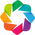

:Bars   [target]   (count)

In [ ]:
# Initialize HoloViews with Bokeh backend
hv.extension('bokeh')

target_counts = merged_df['target'].value_counts().reset_index()
target_counts.columns = ['target', 'count']

count_plot = hv.Bars(target_counts, kdims='target', vdims='count').opts(
    width=600,  # Set plot width
    height=400,  # Set plot height
    tools=['hover'],  # Enable hover tool for interactivity
    show_grid=True,  # Show grid lines
    title='Count of Transactions by Target',  # Add a title
    xlabel='Target',  # Label for x-axis
    ylabel='Amount',  # Label for y-axis
)

count_plot

A lot of imbalance can be seen in here for `target` variable (fraud) where there are very few cases of fraudulent transactions. This is common for such a big dataset as not all transactions would be be showing fraudulence

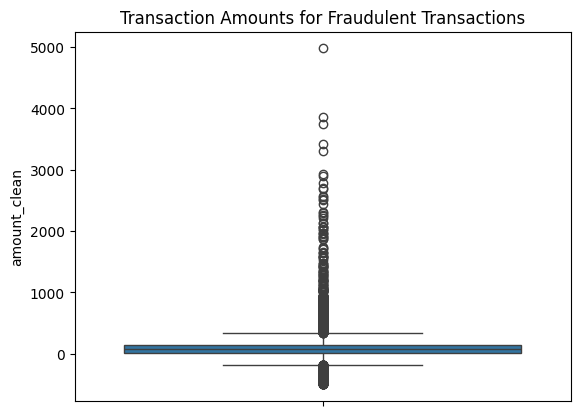

In [ ]:
#To check the spread just for the columns having frauds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for fraudulent transactions (target == 1)
fraud_df = merged_df[merged_df['target'] == 1]

sns.boxplot(y='amount_clean', data=fraud_df)
plt.title('Transaction Amounts for Fraudulent Transactions')
plt.show()


In [ ]:
#Generating acutal count & statistics for amounts present in fraud_df
fraud_df['amount_clean'].describe()

,amount_clean
count,13332.000000
mean,110.234682
std,213.736207
min,-500.000000
25%,17.835000
50%,69.975000
75%,148.492500
max,4978.450000


#### Key Observations:
1. **Fraudulent Transactions in Lower Amounts**:
    - A significant number of fraudulent transactions occur in the lower transaction amount range.
    - This could indicate that fraudsters might target smaller amounts to avoid detection.

2. **Distribution Analysis**:
    - By visualizing the distribution of transaction amounts for fraudulent transactions, we can identify patterns and trends.
    - This analysis can help financial institutions focus on specific ranges of transaction amounts for fraud detection.

In [ ]:
# Plotting a correlation plot
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
# Compute correlation matrix
corr_matrix = merged_df[numeric_cols].corr()
corr_data = corr_matrix.stack().reset_index()
corr_data.columns = ['var1', 'var2', 'correlation']

heatmap = hv.HeatMap(corr_data, kdims=['var1', 'var2'], vdims='correlation').opts(
    width=600,                   # Set plot width
    height=600,                  # Set plot height (square for better visualization)
    tools=['hover'],             # Enable hover tool for interactivity
    cmap='coolwarm',             # Use coolwarm colormap to match Seaborn
    colorbar=True,               # Show colorbar
    title='Correlation Matrix of Numeric Columns',  # Set title
    xlabel='Variable',           # Label for x-axis
    ylabel='Variable',           # Label for y-axis
    xrotation=45,                # Rotate x-axis labels for readability
    fontsize={'title': 12, 'labels': 10, 'xticks': 8, 'yticks': 8},  # Adjust font sizes
    hover_tooltips=[('Var1', '@var1'), ('Var2', '@var2'), ('Correlation', '@correlation{0.2f}')]  # Format hover tooltip
)

heatmap

:HeatMap   [var1,var2]   (correlation)

We dont see any actual correlations present in the dataset for fraudulent transactions so we will check on the basis of card types

### Debit vs Credit Cards: Fraud Analysis
In this section, we analyze how Debit and Credit cards are affected by fraudulent transactions. By examining the data, we aim to understand the distribution of frauds across these two card types.

In [ ]:
# Filtering target by debit & prepaid card type
prepaid_df = merged_df[merged_df['card_type'].str.contains('Prepaid')]
debit_df = merged_df[merged_df['card_type'].str.contains('Debit')]

# Counting the number of fraudulent transactions for prepaid & debit cards
prepaid_fraud_count = prepaid_df[prepaid_df['target'] == 1].shape[0]
debit_fraud_count = debit_df[debit_df['target'] == 1].shape[0]

print("Number of fraudulent transactions for prepaid cards:", prepaid_fraud_count)
print("Number of fraudulent transactions for debit cards:", debit_fraud_count)

Number of fraudulent transactions for prepaid cards: 1378
Number of fraudulent transactions for debit cards: 8842


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
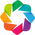

:Bars   [card_type]   (count)

In [ ]:
# Initialize HoloViews with Bokeh backend
hv.extension('bokeh')

card_type_counts = fraud_df['card_type'].value_counts().reset_index()
card_type_counts.columns = ['card_type', 'count']

count_plot_card = hv.Bars(card_type_counts, kdims='card_type', vdims='count').opts(
    width=600,                     # Set plot width
    height=400,                    # Set plot height
    tools=['hover'],               # Enable hover tool for interactivity
    show_grid=True,                # Show grid lines
    title='Distribution of Card Types for Fraudulent Transactions',  # Set title
    xlabel='Card Type',            # Label for x-axis
    ylabel='Count',                # Label for y-axis
    xrotation=45,                  # Rotate x-axis labels for readability
    fill_color='lightblue',        # Match Seaborn's default bar color
    line_color='black',            # Add bar outlines
    hover_formatters={'count': 'numeral'},  # Format hover tooltip
    hover_tooltips=[('Card Type', '@card_type'), ('Count', '@count{0,0}')]  # Show card type and count
)

count_plot_card

#### Key Observations:
1. **Debit Cards**:
    - Debit cards, including prepaid debit cards, are more frequently targeted for fraudulent transactions.
    - The number of fraudulent transactions for debit cards is significantly higher compared to credit cards.

2. **Credit Cards**:
    - Credit cards are also affected by fraud, but the frequency is lower compared to debit cards.
    - Fraudulent transactions for credit cards tend to involve higher amounts compared to debit cards.

### Fraud Analysis Trend Using Time-Series Data

In this section, we analyze the trend of fraudulent transactions over time. By examining the time-series data, we aim to identify patterns, spikes, or seasonal trends in fraudulent activities.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
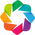

<ipython-input-51-542ac68ae951>:10: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension()


Row
    [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=800)
    [1] WidgetBox(align=('end', 'start'))
        [0] DiscreteSlider(name='year', options={'2010': np.int32(2010), ...}, value=np.int32(2010))

In [ ]:
import panel as pn
from bokeh.plotting import output_notebook
from bokeh.models import HoverTool

# Ensure Bokeh output is set to the notebook
output_notebook()

# Initialize HoloViews and Panel
hv.extension('bokeh')
pn.extension()

# Convert date column to datetime in merged_df (before filtering)
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter for fraudulent transactions (target == 1)
fraud_df = merged_df[merged_df['target'] == 1].copy()

# Group fraudulent transactions by date and count occurrences
fraud_trend = fraud_df.groupby(fraud_df['date'].dt.date).size().reset_index(name='count')
fraud_trend.columns = ['date', 'count']

# Ensure date is still in datetime format after grouping
fraud_trend['date'] = pd.to_datetime(fraud_trend['date'])

# Extract year for grouping
fraud_trend['year'] = fraud_trend['date'].dt.year

# Get list of unique years for the slider
years = sorted(fraud_trend['year'].unique())

# Define a function to create a plot for a given year
def plot_fraud_trend(year):
    # Filter data for the selected year
    year_data = fraud_trend[fraud_trend['year'] == year]

    # Create a Curve plot
    curve = hv.Curve(year_data, kdims='date', vdims='count').opts(
        width=800,
        height=400,
        title=f'Trend of Fraudulent Transactions Over Time ({year})',
        xlabel='Date',
        ylabel='Number of Fraudulent Transactions',
        xrotation=45,
        show_grid=True,
        tools=[HoverTool(tooltips=[
            ('Date', '@date{%F}'),
            ('Count', '@count{0,0}')
        ], formatters={'@date': 'datetime'})],
        line_color='blue',
        line_width=2
    )
    return curve

# Create a DynamicMap with a slider for the year
dmap = hv.DynamicMap(plot_fraud_trend, kdims='year').redim.values(year=years).opts(
    framewise=True
)

# Display the plot inline in Colab using Panel
pn.panel(dmap)

#### Key Observations:
1. **Trend Over Time**:
    - The number of fraudulent transactions may vary over time, with potential spikes during certain periods.
    - Analyzing these trends can help financial institutions prepare for periods of increased fraudulent activity.

2. **Seasonal Patterns**:
    - There might be seasonal trends in fraudulent transactions, such as higher activity during holidays or specific months.

3. **Insights for Prevention**:
    - Understanding the time-series trend can help in implementing proactive measures to prevent fraud during high-risk periods.

Overall, the period shows fluctuating fraud trends, with notable peaks in 2010, 2013-2014, and 2016-2018, interspersed with periods of low activity, likely reflecting the evolving nature of fraud prevention and detection strategies.